# 190639B

# EN2550: Assignment 03 on Object Counting on a Conveyor Belt<a href="#EN2550:-Assignment-03-on-Object-Counting-on-a-Conveyor-Belt" class="anchor-link"></a>

## Connected Component Analysis<a href="#Connected-Component-Analysis" class="anchor-link"></a>


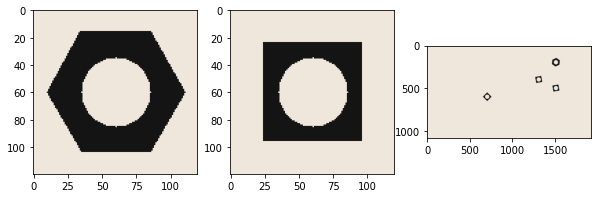

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template = cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()


Threshold value for hexnut_template is 20.0
Threshold value for squarenut_template is 20.0
Threshold value for conveyor_f100 is 20.0


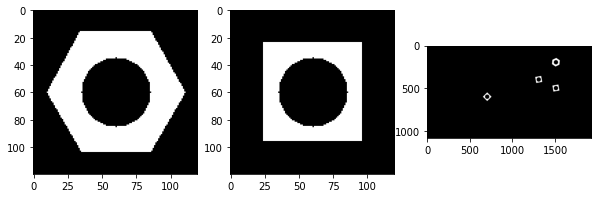

In [2]:
hexnut_template_gray=cv.cvtColor(hexnut_template,cv.COLOR_BGR2GRAY)
squarenut_template_gray=cv.cvtColor(squarenut_template,cv.COLOR_BGR2GRAY)
conveyor_f100_gray=cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)

#blur1 = cv.GaussianBlur(hexnut_template_gray,(5,5),0)
ret1,th1 = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#blur2 = cv.GaussianBlur(squarenut_template_gray,(5,5),0)
ret2,th2 = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
#blur3 = cv.GaussianBlur(conveyor_f100_gray,(5,5),0)
ret3,th3 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th1,th2,th3=cv.bitwise_not(th1),cv.bitwise_not(th2),cv.bitwise_not(th3)

print("Threshold value for hexnut_template is",ret1)
print("Threshold value for squarenut_template is",ret2)
print("Threshold value for conveyor_f100 is",ret3)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(th1,cmap='gray')
ax[1].imshow(th2,cmap='gray')
ax[2].imshow(th3,cmap='gray')
plt.show()


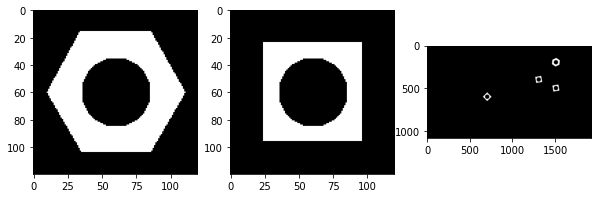

In [3]:
kernel=np.ones((3,3),np.uint8)
closing1= cv.morphologyEx(th1,cv.MORPH_CLOSE,kernel)
closing2= cv.morphologyEx(th2, cv.MORPH_CLOSE, kernel)
closing3= cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(closing1,cmap='gray')
ax[1].imshow(closing2,cmap='gray')
ax[2].imshow(closing3,cmap='gray')
plt.show()


In [4]:
connectivity = 4
num_labels1,labels1,stats1,centroids1=cv.connectedComponentsWithStats(closing1, connectivity)
num_labels2,labels2,stats2,centroids2=cv.connectedComponentsWithStats(closing2, connectivity)
num_labels3,labels3,stats3,centroids3=cv.connectedComponentsWithStats(closing3, connectivity)
print('Hexnut_Template')
print('Number of connected components', num_labels1)
for r in range(num_labels1):
    print('Component',r)
    print(stats1[r][cv.CC_STAT_LEFT],'\t',': The leftmost (x) coordinate ')
    print(stats1[r][cv.CC_STAT_TOP],'\t',': The topmost (y) coordinate ')
    print(stats1[r][cv.CC_STAT_WIDTH],'\t',': The horizontal size of bounding box ')
    print(stats1[r][cv.CC_STAT_HEIGHT],'\t',': The vertical size of bounding box')
    print(stats1[r][cv.CC_STAT_AREA],'\t',': The total are of connected components in pixels\n')
for r in range(num_labels1):
    print('centroid of component {} is'.format(r), centroids1[r])

print("\nSquarenut_template")
print('Number of connected component', num_labels2)
for r in range(num_labels2):
    print('Component',r)
    print(stats2[r][cv.CC_STAT_LEFT],'\t',': The leftmost (x) coordinate')
    print(stats2[r][cv.CC_STAT_TOP],'\t',': The topmost (y) coordinate ')
    print(stats2[r][cv.CC_STAT_WIDTH],'\t',': The horizontal size of bounding box ')
    print(stats2[r][cv.CC_STAT_HEIGHT],'\t',': The vertical size of bounding box')
    print(stats2[r][cv.CC_STAT_AREA],'\t',': The total are of connected components in pixels\n')
for r in range(num_labels2):
    print('centroid of component {} is'.format(r), centroids2[r])
print("\nconveyor_f100")
print('Number of connected components', num_labels3)
for r in range(num_labels3):
    print('Component',r)
    print(stats3[r][cv.CC_STAT_LEFT],'\t',': The leftmost (x) coordinate ')
    print(stats3[r][cv.CC_STAT_TOP],'\t',': The topmost (y) coordinate ')
    print(stats3[r][cv.CC_STAT_WIDTH],'\t',': The horizontal size of bounding box ')
    print(stats3[r][cv.CC_STAT_HEIGHT],'\t',': The vertical size of bounding box')
    print(stats3[r][cv.CC_STAT_AREA],'\t',': The total are of connected components in pixels\n')
for r in range(num_labels3):
    print('centroid of component {} is'.format(r), centroids3[r])

Hexnut_Template
Number of connected components 2
Component 0
0 	 : The leftmost (x) coordinate 
0 	 : The topmost (y) coordinate 
120 	 : The horizontal size of bounding box 
120 	 : The vertical size of bounding box
9672 	 : The total are of connected components in pixels

Component 1
10 	 : The leftmost (x) coordinate 
16 	 : The topmost (y) coordinate 
101 	 : The horizontal size of bounding box 
88 	 : The vertical size of bounding box
4728 	 : The total are of connected components in pixels

centroid of component 0 is [59.33684864 59.63513234]
centroid of component 1 is [59.83375635 59.22356176]

Squarenut_template
Number of connected component 2
Component 0
0 	 : The leftmost (x) coordinate
0 	 : The topmost (y) coordinate 
120 	 : The horizontal size of bounding box 
120 	 : The vertical size of bounding box
11173 	 : The total are of connected components in pixels

Component 1
24 	 : The leftmost (x) coordinate
24 	 : The topmost (y) coordinate 
72 	 : The horizontal size of bo

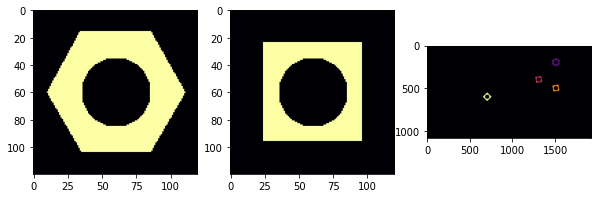

In [5]:
labels1=np.uint8(labels1)
labels1=cv.normalize(labels1,None,0,255,cv.NORM_MINMAX)
labels1=cv.applyColorMap(labels1,cv.COLORMAP_INFERNO)
labels2=np.uint8(labels2)
labels2=cv.normalize(labels2,None,0,255,cv.NORM_MINMAX)
labels2=cv.applyColorMap(labels2,cv.COLORMAP_INFERNO)
labels3=np.uint8(labels3)
labels3=cv.normalize(labels3,None,0,255,cv.NORM_MINMAX)
labels3=cv.applyColorMap(labels3,cv.COLORMAP_INFERNO)
fig, ax = plt. subplots(1,3,figsize=(10,5))
ax[0].imshow(cv.cvtColor(labels1,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(labels2,cv.COLOR_BGR2RGB))
ax[2].imshow(cv.cvtColor(labels3,cv.COLOR_BGR2RGB))
plt.show()

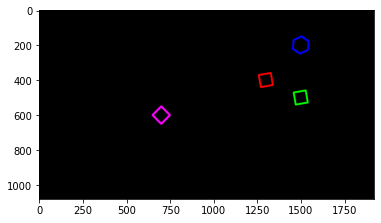

In [6]:
contours3, hierarchy = cv.findContours(closing3, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
con_copy=cv.cvtColor(closing3.copy(),cv.COLOR_BGR2RGB)
con_copy1=np.zeros(con_copy.shape,dtype=int)
colors=[(255,0,255),(0,255,0),(255,0,0),(0,0,255)]
for r in range(len(contours3)):
    cv.drawContours(con_copy1,contours3,r,colors[r],10)
plt.imshow(con_copy1)
plt.show()

# Detecting Objects on a Synthetic Conveyor

In [7]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    f += 1
    text = 'Frame:' + str(f)
    
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


In [8]:
contours1,hierarchy = cv.findContours(closing1,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
count = 0
for r in range(len(contours3)):
    ret = cv.matchShapes(contours1[0],contours3[r],1,0.0)
    if ret < 0.001:
        count+=1
print("No of matching hexagonal nuts -",count)

No of matching hexagonal nuts - 1


In [11]:
def objCount(hex_con, sqr_con, vid_frame):
    global hexnutCount
    global squarenutCount
    global reference
    ret4,th4 = cv.threshold(cv.cvtColor(vid_frame,cv.COLOR_BGR2GRAY),0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
    th4 = cv.bitwise_not(th4)
    kernel = np.ones((3,3), np.uint8)
    closing4 = cv.morphologyEx(th4, cv.MORPH_CLOSE, kernel)
    contours4, hierarchy= cv.findContours(closing4, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    hex_count, sqr_count = 0,0
    reference_ = 0
    for i in contours4:
        center = min(i[:,0,0])
        ret_hex = cv.matchShapes(hex_con[0],i,1,0.0)
        ret_sqr = cv.matchShapes(sqr_con[0],i,1,0.0)
        if ret_hex < 0.0015:
            hex_count+=1
            if reference_ < center:
                reference_ = center
            if center > reference:
                hexnutCount += 1
                
        if ret_sqr < 0.0015:
            sqr_count+=1
            if reference_ < center:
                reference_ = center
            if center > reference:
                squarenutCount += 1
    if any([hex_count,sqr_count]):
        reference = reference_
    return hex_count, sqr_count

In [12]:
frame_array = []
shape = (1080, 1920, 3)

contours2,hierarchy = cv.findContours(closing2,cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
hexnutCount,squarenutCount,reference=0,0,0

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    
    hx, sqr = objCount(contours1, contours2, frame)

    f += 1
    txt1 = 'Frame:' + str(f)
    txt2 = "Hexagonal Nuts count in the current frame =" + str(hx)
    txt3 = "Square Nuts count in the current frame =" + str(sqr)
    txt4 = "Total Hexagonal Nuts count upto the current frame = " + str(hexnutCount)
    txt5 = "Total Square Nuts count upto the current frame = " + str(squarenutCount)
    cv.putText(frame,txt1 , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.putText(frame,txt2 , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    cv.putText(frame,txt3 , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    cv.putText(frame,txt4 , (100, 200), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    cv.putText(frame,txt5 , (100, 250), cv.FONT_HERSHEY_COMPLEX, 1, (250,0,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)
    frame_array.append(frame)
    if cv.waitKey(1) == ord('q'):
        break
cap.release()
cv.destroyAllWindows()
out = cv.VideoWriter('./conveyor_result_190639B.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()


Can't receive frame (stream end?). Exiting.


github-https://github.com/Dinuka-1999/Assignment/tree/master/new_assignment3